# Predictive Models for Preventable Hospitalizations In California

Counties

A Data-Driven Approach to Understanding the Causes of Preventable Hospitalizations

Felix Huang  
Kevin Kiser

# Introduction

The fields of public health and statistics are fundamentally intertwined. This is especially so when looking at Social Determinants of Health (SDOH), which have problems that require more complex analytical models to analyze and inform. Data science, being a cross-disciplinary skill of statistics and computer science, is perfect for addressing these issues.\[@pmc11001304\] This project intends to leverage advanced machine learning models within the discipline of data scienc,e as well as the traditional data gathered for SDOH, to gain insight into the potential causes of preventable hospitalizations within the counties of California.

    The key steps involved were: 

Data Collection: Gathering accurate and real SDOH data provided by government agencies such as CalHHS, California Open Data Portal, and the US Census. Data were then joined into one large dataframe.

Multiple Linear Regression: A unique model was created for every county using all available predictors.

K-means Clustering: R-squared values obtained for each county from the multiple linear regression models were then used as feature vectors in K-means clustering.

Principal Component Analysis: PCA was used to reduce the dimensionality of the K-means clustering data into something that was able to be visualized.

Stepwise Regression: Bidirectional stepwise selection was used to select the final linear regression models, which automatically identified and included only the statistically significant predictors relevant to that county’s data.

# Background

Social determinants of health encompass a wide range of social, economic, and environmental factors that influence health outcomes across an individual’s lifespan. These include conditions related to birth, early development, living environment, education, employment, and aging, along with access to financial resources, political power, and social support systems. SDOH studies are very common in the field of public health. Often, these studies are performed by leveraging publicly available data or by survey sampling. Most studies look at particular social determinants and utilize descriptive statistics and basic modeling for analysis.

California healthcare spending is estimated at around \$400 billion annually, with Medi-Cal being an estimated \$160 billion of it. \[@lao4941\] With the cost of healthcare rising every year, many California residents are unable to keep up. Hospitalizations in particular constitute a substantial portion of healthcare spending, with many being preventable. This project builds on to the traditional SDOH study by employing advanced machine learning techniques to investigate the associations between social determinants of health and preventable hospitalization rates at the county level within California. The analysis identifies underlying patterns both within individual counties and between different counties, offering insights into the broader structural and regional dynamics that contribute to disparities in preventable hospitalizations.

Four social determinants of health were chosen for analysis across 58 counties in California: Education, Unemployment, Type of Employment, and Racial demographics. Education, Race, and Unemployment were chosen due to the extensive studies done that show that they have direct impacts on health. \[@annurev_sdh;@hahn_education;@lundqvist2016public\] Three types of Employment were included: Manufacturing, Transportation, and Agriculture. These three types of employment had the most usable data across all counties, and we deemed that they were diverse enough to have interesting results.

# Methods

## Data Collection

Data for this study were sourced from publicly available government repositories, including the California Health and Human Services Agency (CalHHS)\[@chhs_hospitalizations\], the California Open Data Portal (CODP)\[@ces_employment\], and the United States Census Bureau. County-level public health metrics, such as rates of preventable hospitalizations and population estimates, were obtained from CalHHS. Employment-related indicators, including overall employment rates and the distribution of employment types across counties, were retrieved from the CODP. Education levels and racial and ethnic demographics were obtained from US Census data. Data from all sources were obtained for the years of 2005 to 2023, allowing for a multi-year analysis of county-level trends.

## Data Ingestion

Data from CalHHS and CODP were obtained in CSV format, then cleaned using R. Unnecessary variables were removed, and the data frames were joined together. The tidyverse package in R allowed direct inclusion of US Census data. The census data were loaded in and merged to create the final dataframe for analysis. It is worth mentioning that the census data has repeating values because it is aggregated every 5 years. Six California counties were dropped due to a lack of data: Mono, Sierra, Modoc, Trinity, Alpine, and Inyo. These counties have small populations, which may have contributed to the lack of collected data for them. Values were then calculated as percentages of the population per county, per year. Preventable Hospitalizations were calculated at a rate per capita per 100,000 population as composite-specific types of hospital visits that have been predetermined to be preventable. This includes: COPD, Asthma, Diabetes, Pneumonia, and UTIs. A diversity index for races was created using the Gini-Simpson Index Formula \[@nature_diversity\]. $$
\text{Gini-Simpson Index} = 1 - \sum_{i=1}^{S} p_i^2
$$

Preliminary exploratory data analysis revealed a downward trend in preventable hospitalizations in every County and Region of California since 2005 (see Figure 1 and Figure 2). There was a sharp decline in 2020; however, this could be due to the COVID-19 epidemic that year, which caused hospitals to allocate fewer resources and admit fewer individuals for hospitalizations outside of SARS-CoV-2.\[@pmc7769002\]

| 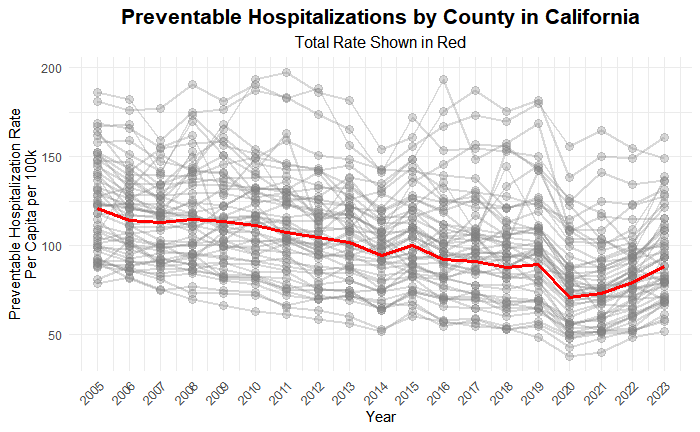{#fig-fig1 width="95%"} | 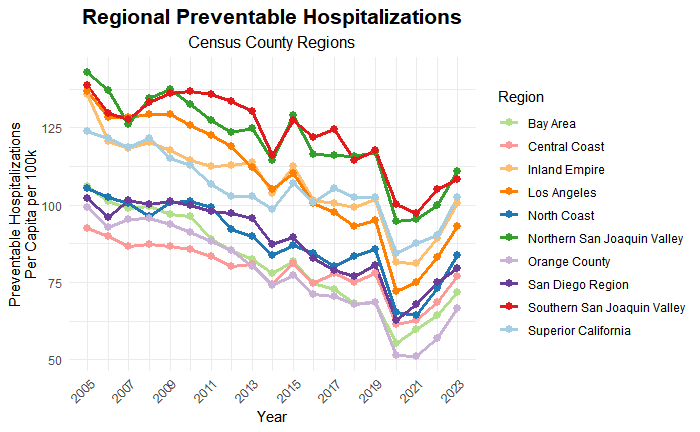{#fig-fig2 width="95%"} |
|:----------------------------------:|:----------------------------------:|
| **Figure 1.** Downward trend in Preventable Hospitalizations Across All Counties | **Figure 2.** Downward Trend in Preventable Hospitalizations Across All Regions |

## Entity Relationship Diagram

The Entity Relationship Diagram (ERD) shows three initial datasets for preventable hospitalizations, census data, and Industry sectors, all being joined by county-year as a unique key. Results from that data were exported to a Jupyter notebook to perform cluster analysis. Results from the cluster analysis were merged back into the final dataframe using county as the key for a one-to-many relationship since the clustering is for the entire duration and not specific to any single year. The final dataframe cannot be considered completely normalized due to the repeating values used from the census data.

<figure>
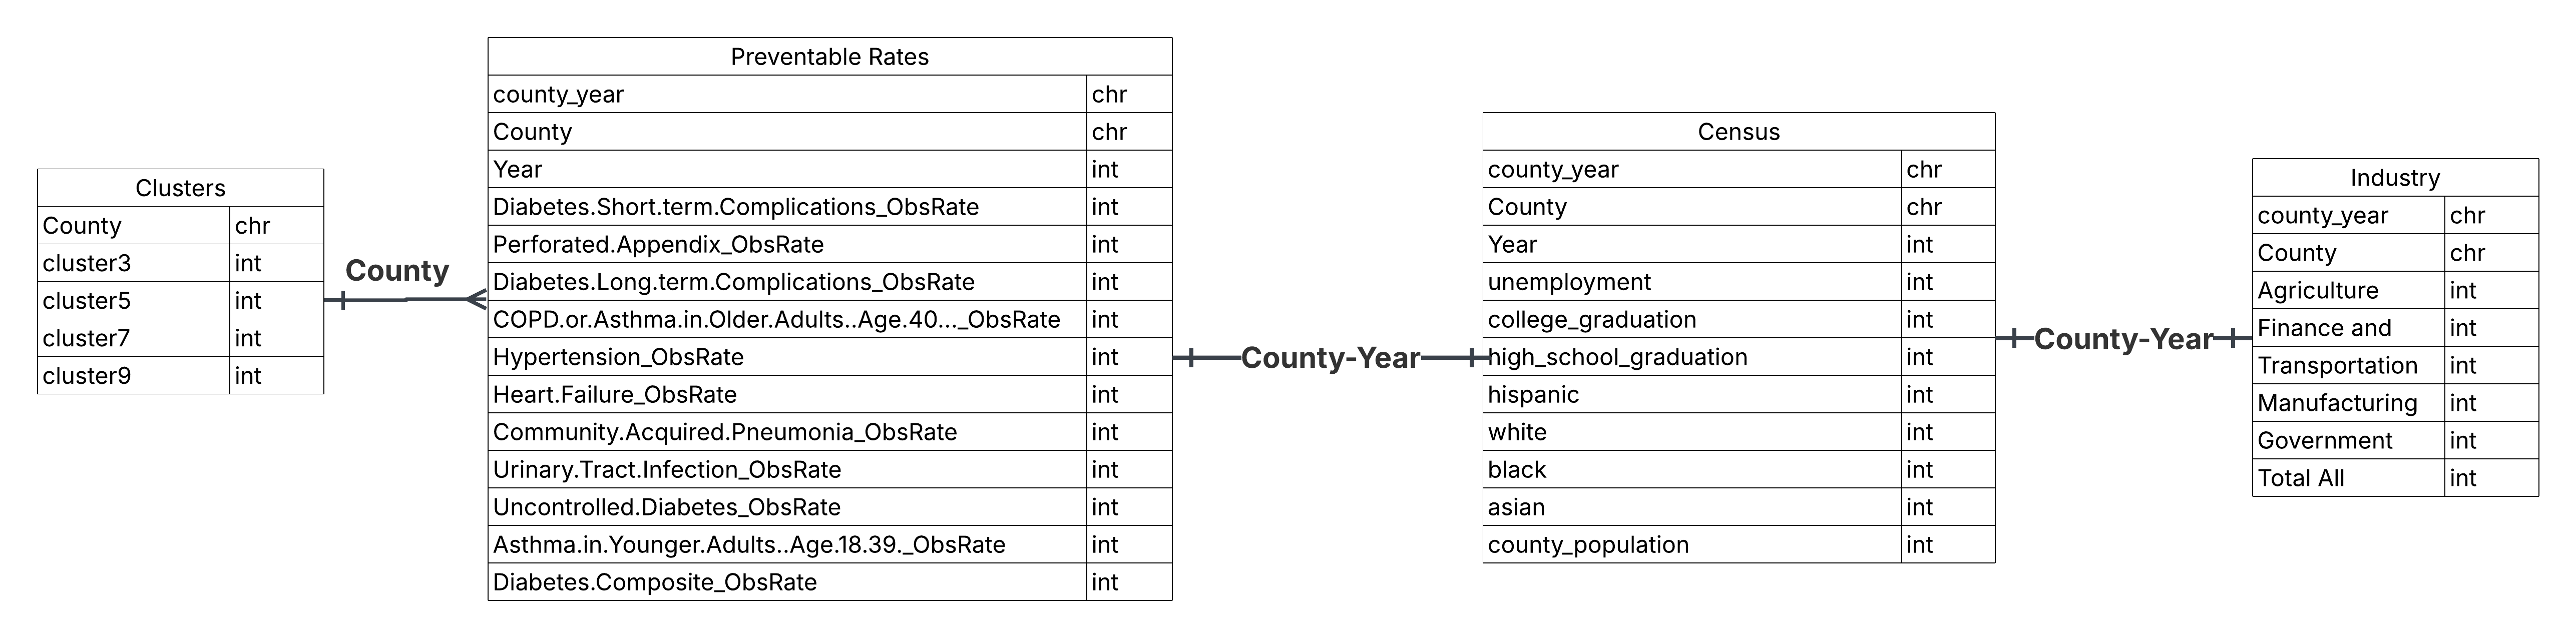
<figcaption>ERD</figcaption>
</figure>

## Ethical Considerations

Public health and census data often encapsulate long-standing structural inequalities, including those stemming from historical patterns of segregation, disparities in educational and occupational opportunities, and inequitable access to healthcare services across racial and socioeconomic strata. There have also been ethical concerns about the use of census data for healthcare research. While census data may be anonymized, the nature of the data involves categorizing individuals into blanket categories, such as lumping all Asian ethnicities together or the “some other race” option. Using a composite Diversity Index sought to remove the implications associated with targeting a specific race. There is also inherent bias within the census process, such as non-response bias.\[@uksa_geospatial;@census_nonresponse\] These inherent biases were acknowledged and taken into consideration when performing the analysis. Due to the nature of these data, all data are treated as a representation of people rather than just numbers, and appropriate language was used. To mitigate bias for race and ethnicity, data was used to create a diversity index per county rather than looking at the spread of individual ethnicities.

## Modeling

The goal of this project was to build a set of models to provide inference on which primary predictors are most effective for modeling preventable hospitalization rates in each county. Primary modeling was conducted using multiple linear regression to create a unique model for every county. The first set of models used all of the predictive variables, individually modeled to predict preventable hospitalizations, providing an R-squared value for each predictor in each county. Regression assumptions were tested for each county model using Shapiro-Wilks Tests, VIF, $R^2$ values, and Breusch-Pagan Tests.

The set of R-squared values was then used as a feature vector for K-means clustering. Clustering at different values of k was evaluated using the Within Cluster Sum of Squares (WCSS). For the purposes of inference, k=5 was selected and used in further analysis as it was a good fit for interpretation. Principal Component Analysis (PCA) was implemented to reduce the dimensionality into something that could be visualized. Visualizing the results of the k-means clustering using principal components provided evidence that the clusters were accurately delineated into meaningful regions. The clusters were then visualized spatially on a county map to determine patterns.

The final linear regression models were established using bidirectional stepwise regression that selected the significant predictors and only incorporated them into the final model for each county. VIF scores were then used in each county model to remove collinear predictors, depending on the individual models. Predictor variables with a VIF greater than 10 were removed. The results of the final models were visualized on the map to determine patterns.

# Results

## Linear Regression Analysis

Different SDOH factors and their relationship with Preventable Hospitalizations across the different California Counties. California counties are extremely diverse, so individual linear models were ran for each county. Due to the high number of counties, the typical scatter plots and trend lines were not visualized. The $R^2$ values revealed that as sole predictors, Education Level had a high correlation for most counties. Due to the high collinearity between high school graduation and college graduation, it was necessary to entirely remove one of the variables. High school graduation was selected due to better performance at predicting preventable hospitalizations. Figure 3 shows high school graduation exhibiting a large number of counties with high $R^2$ values, making it the best single predictor for preventable hospitalizations. The type of employment had lower $R^2$ values across the board, with some counties having more correlation with Transportation and Manufacturing. Unemployment had low $R^2$ values for most counties, however, there is still a subset of counties that might rely on it as an accurate predictor in final modelling. Diversity Index had high $R^2$ values for a certain set of counties, suggesting that as a single predictor, it has relevance in final modelling.

The following figures show the distribution of $R^2$ values across counties for univariate models. So each frequency is the number of counties with $R^2$ values

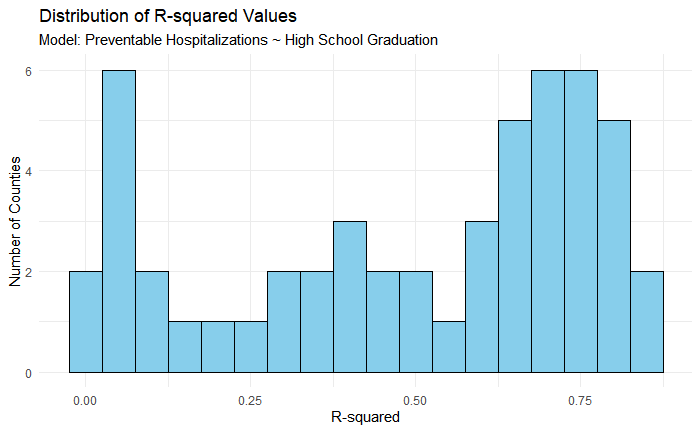{#fig-fig3 width="100%"}  
**Figure 3.** $R^2$ – High School Graduation

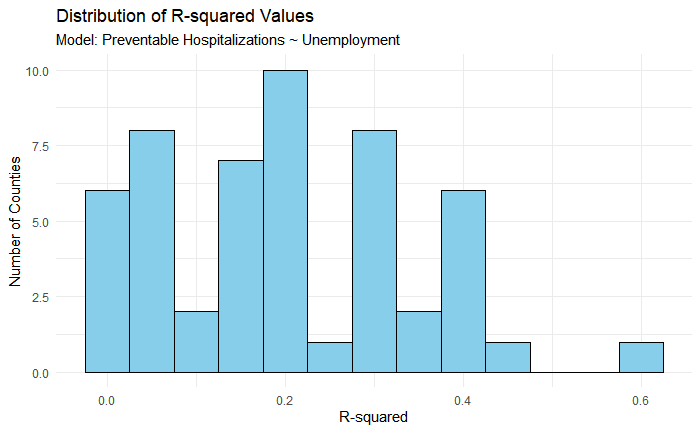{#fig-fig4 width="100%"}  
**Figure 4.** $R^2$ – Unemployment

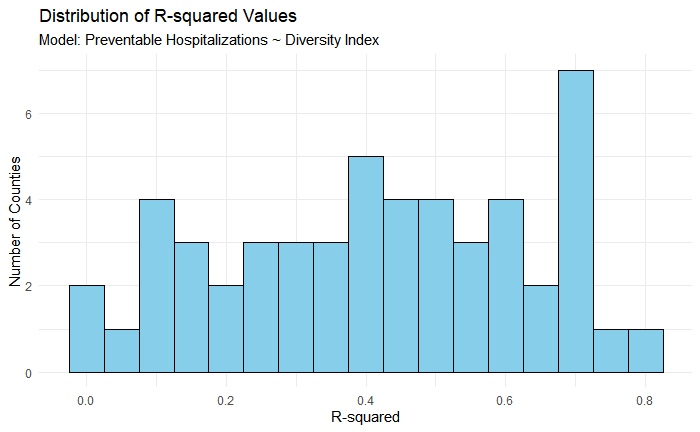{#fig-fig5 width="100%"}  
**Figure 5.** $R^2$ – Diversity Index

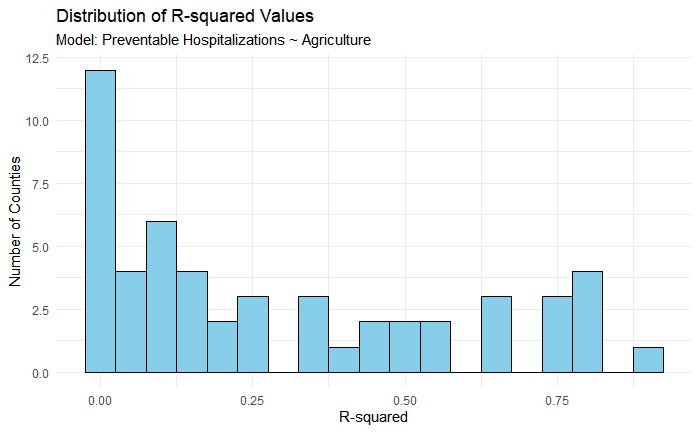{#fig-fig6 width="100%"}  
**Figure 6.** $R^2$ – Agriculture Employment

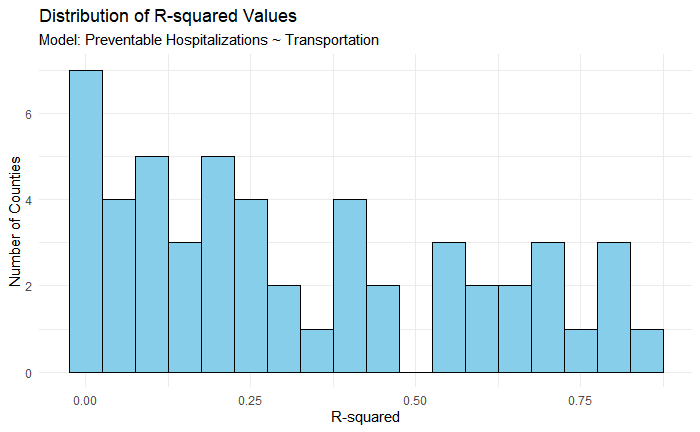{#fig-fig7 width="100%"}  
**Figure 7.** $R^2$ – Transportation

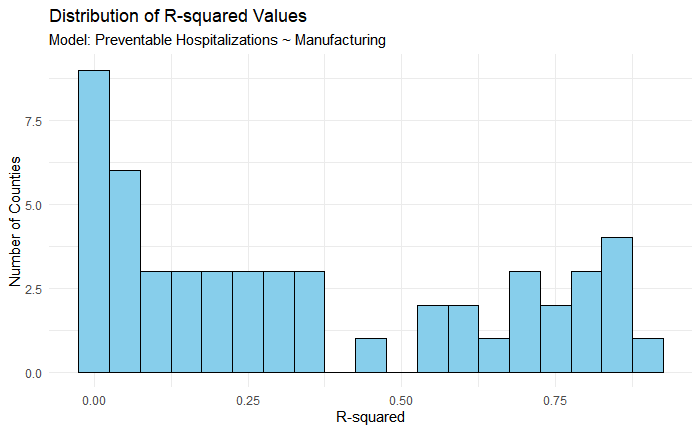{#fig-fig8 width="100%"}  
**Figure 8.** $R^2$ – Manufacturing Employment

## K-Means Clustering & PCA

K-means clustering with k=5 revealed distinct patterns in model performance across county groupings. Clusters 0 and 2 were characterized by generally poor model fit, as shown by low adjusted $R^2$ values across most counties. Clusters 1, 3, and 4, however, showed stronger model performance, with a greater proportion of counties having higher $R^2$ values. Cluster 1 was primarily driven by Unemployment, High School Graduation, and the Diversity Index as key predictive variables. Cluster 3 produced moderately strong models, with Transportation, High School Graduation, and the Diversity Index emerging as the most influential predictors. Cluster 4 achieved the best model performance, with the Diversity Index, Agricultural employment, and Manufacturing employment contributing the most towards the predictive strength of the models.

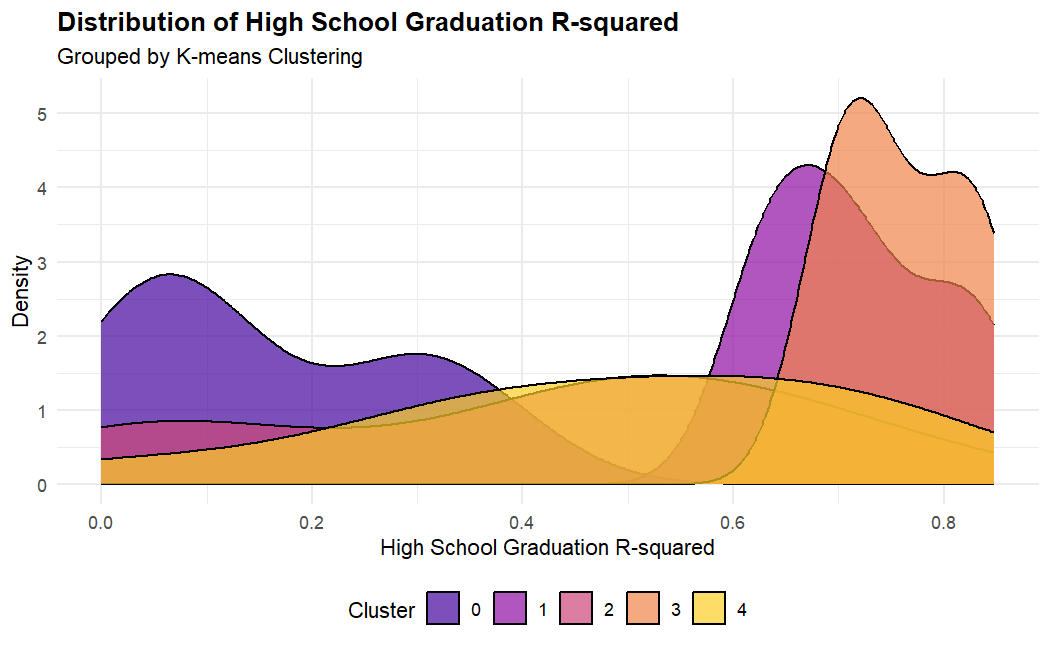{#fig-fig9 width="100%"}  
**Figure 9.** $R^2$ – Unemployment by Cluster

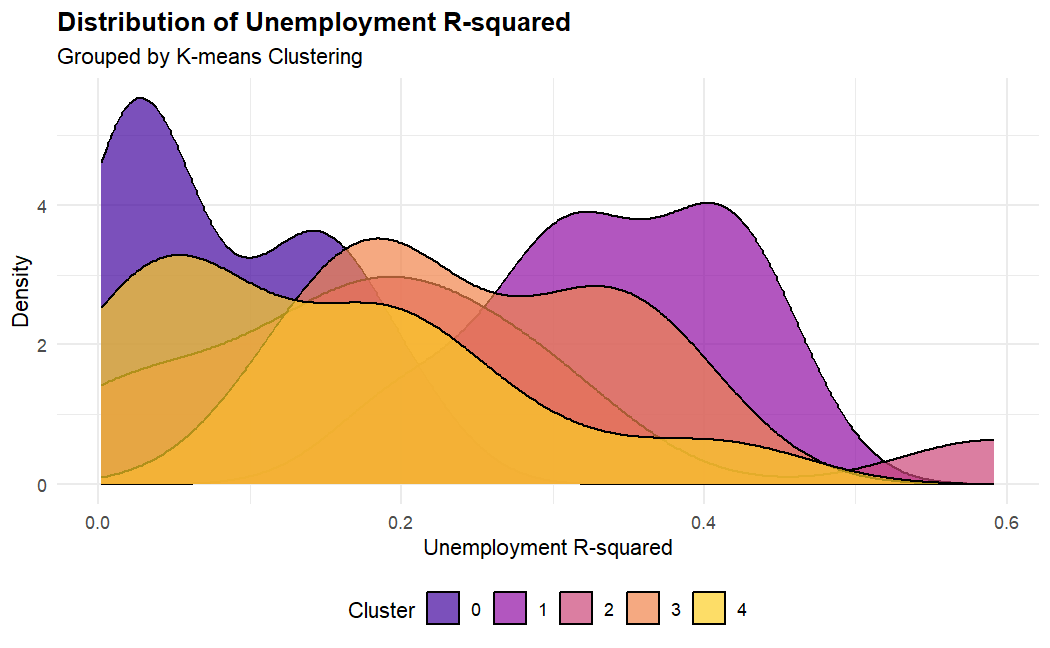{#fig-fig10 width="100%"}  
**Figure 10.** $R^2$ – Diversity Index by Cluster

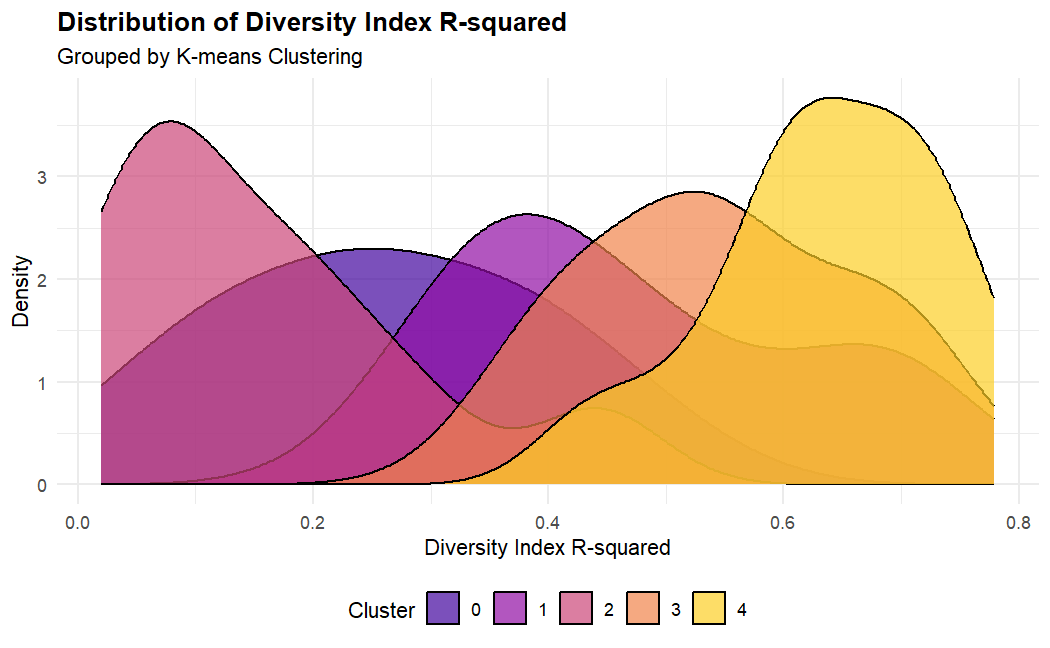{#fig-fig11 width="100%"}  
**Figure 11.** $R^2$ – Agriculture by Cluster

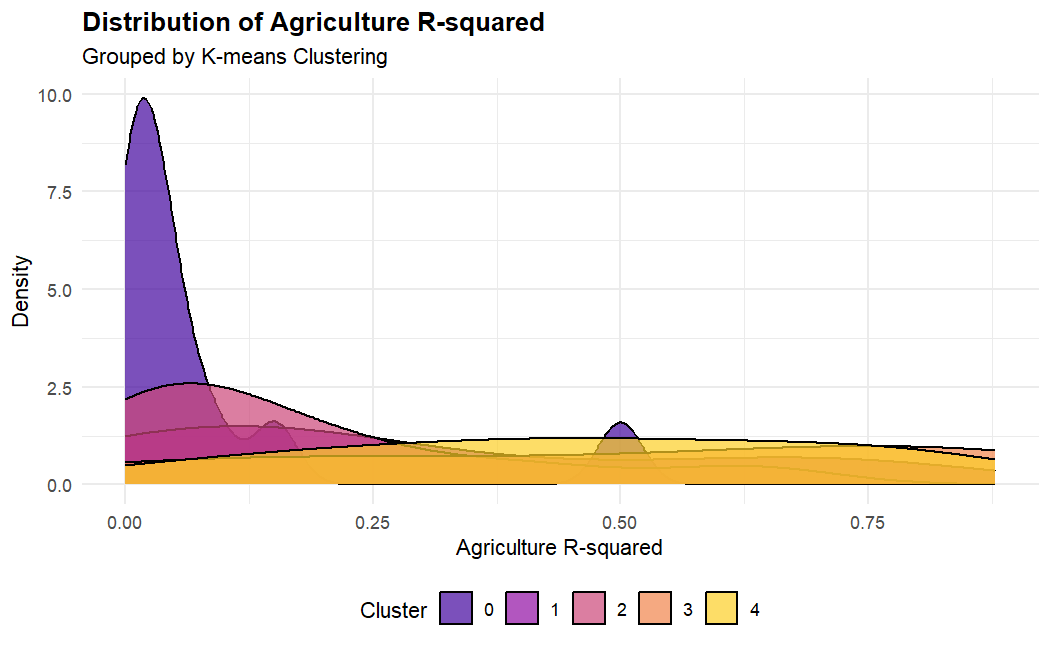{#fig-fig12 width="100%"}  
**Figure 12.** $R^2$ – Manufacturing by Cluster

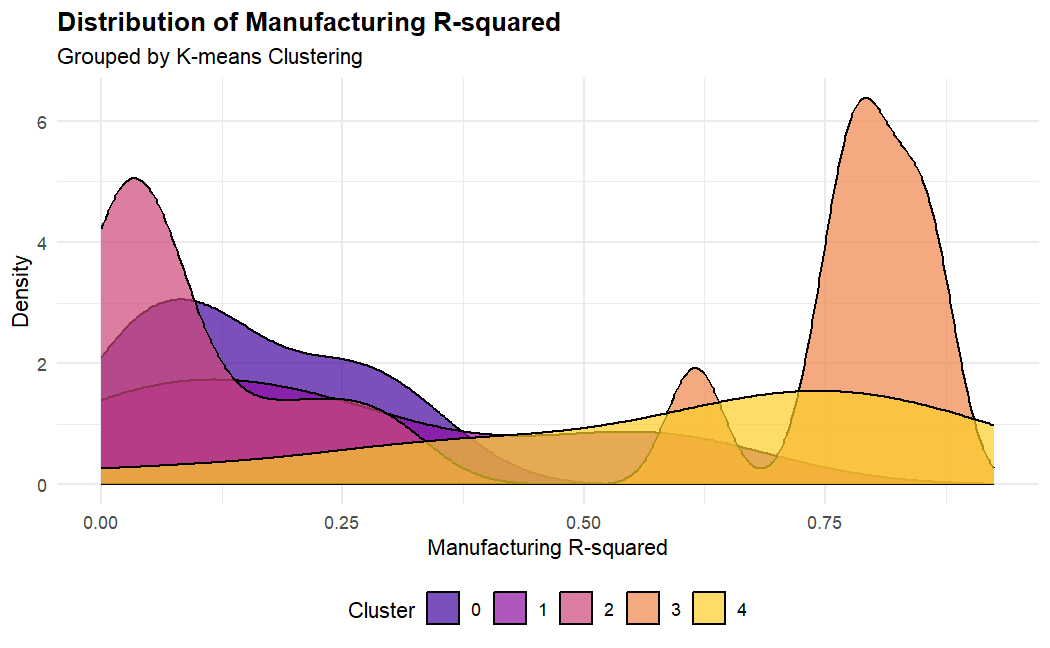{#fig-fig13 width="100%"}  
**Figure 13.** $R^2$ – Transportation by Cluster

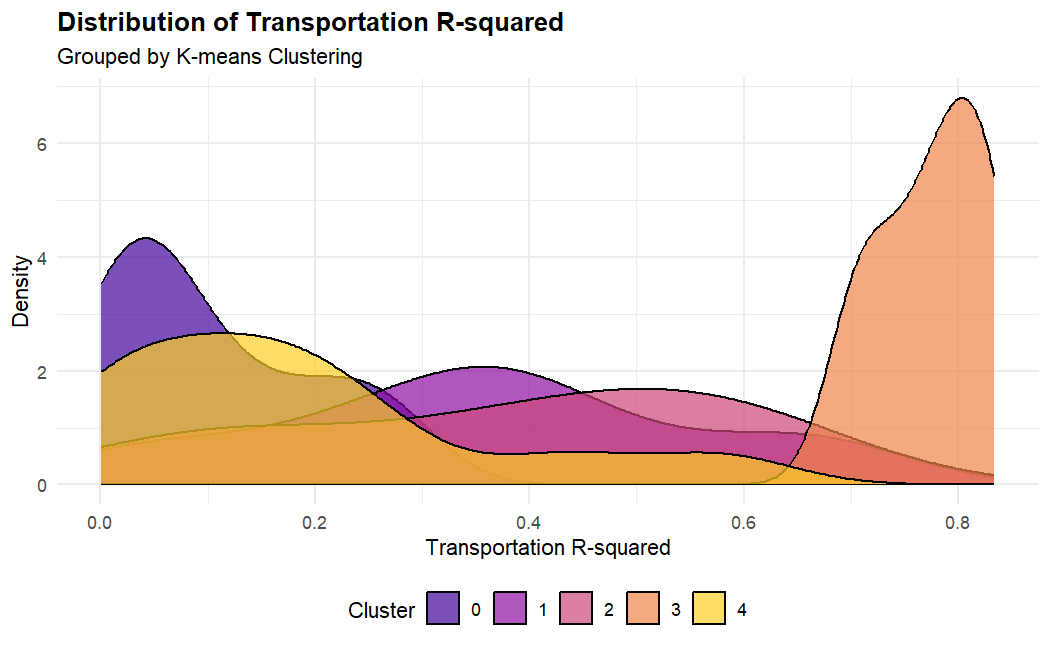{#fig-fig14 width="100%"}  
**Figure 14.** $R^2$ – High School Graduation by Cluster

Each county was assigned one of five clusters based on the predictive strength of individual variables. The resulting map highlights regional similarities in the underlying social determinants of preventable hospitalizations.

<figure>
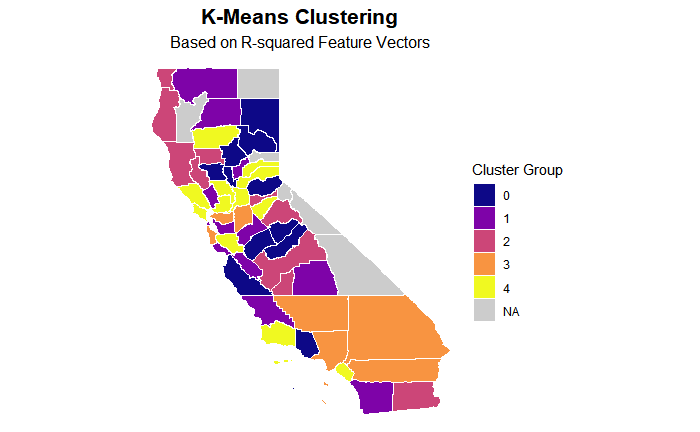
<figcaption>K-Means Clustering By Region</figcaption>
</figure>

PCA shows that there is reasonably distinct separation between clusters, which supports the validity of our K-Means model. $R^2$ vectors carry enough structure to form meaningful clusters.

<figure>
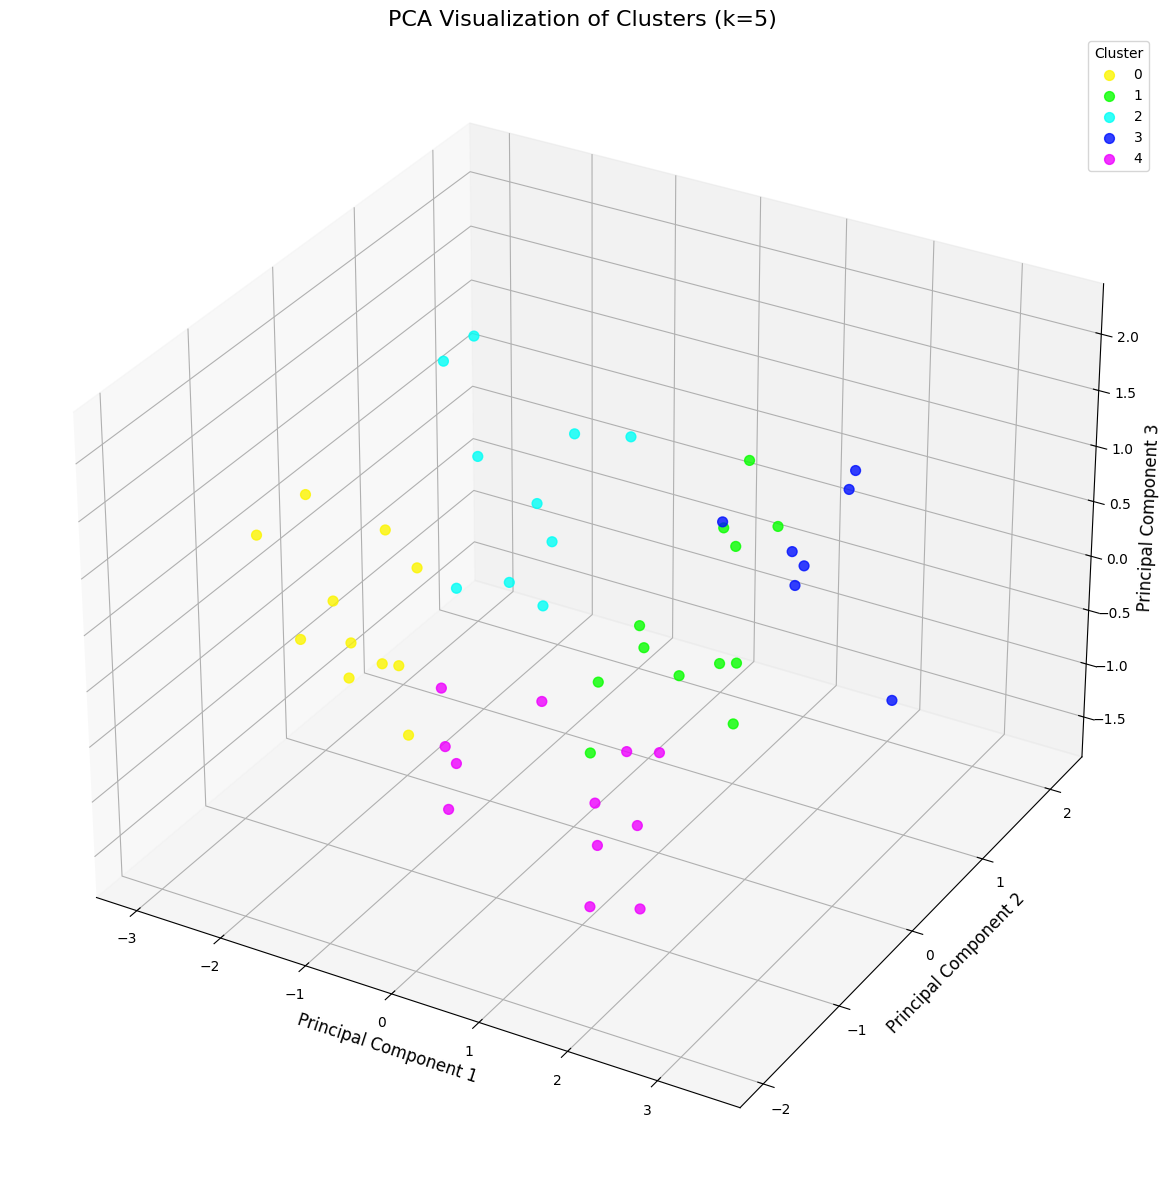
<figcaption>PCA Visualization of Clusters (k=5)</figcaption>
</figure>

**Figure 16.** PCA Visualization of K-means Clusters Based on R-squared Feature Vectors.

# Stepwise Regression

Results from bilateral stepwise regression show model construction for each individual county. Figures 17 and 18 represent the final model for each particular county in terms of the final adjusted $R^2$ and the number of significant predictors in each model. The results shown in Figure 17 indicate a trend towards better model predictability in higher population coastal regions. In comparison, the agricultural regions of the Central Valley and the Sacramento Valley exhibit lower adjusted $R^2$ values. Figure 18 shows the number of predictors selected in each county model. There is evidence for a trend towards the better performing models in the high population coastal regions to also incorporate more predictors into the final model. However, there no models that incorporate all six predictor variables. Two of the county models used five predictors, with most of the concentration in. Merced County was the only county to have no significant predictors and therefore have no model. This is shown with an Adjusted $R^2$ value of zero and zero predictors.

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr class="odd">
<td style="text-align: left;"><div class="column" data-layout-align="left" style="width:50.0%;">
<p>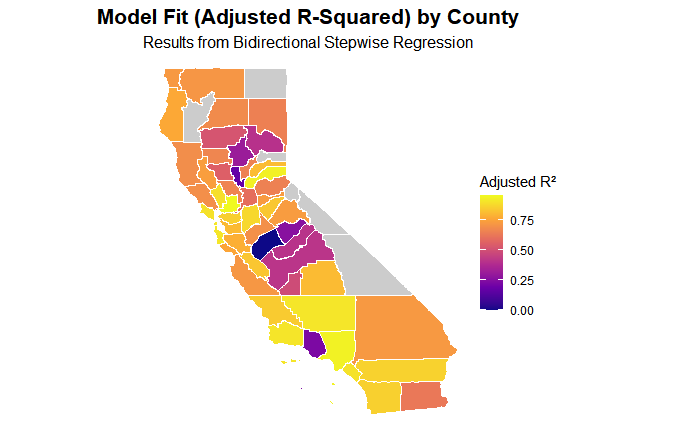 <strong>Figure 17.</strong> Adjusted <span class="math inline">\(R^2\)</span> Value By County</p>
</div></td>
<td style="text-align: left;"><div class="column" data-layout-align="left" style="width:50.0%;">
<p>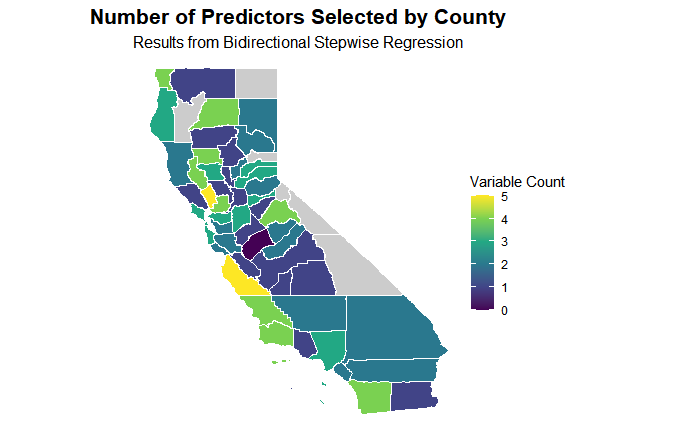 <strong>Figure 18.</strong> Number of Predictors Selected by County</p>
</div></td>
</tr>
</tbody>
</table>

# Conclusions

The clustering analysis reveals a clear separation between poorly and strongly performing regression models based on their adjusted R-squared values. Models in clusters 0 and 2 generally exhibit low predictive performance, while those in clusters 1 and 4 demonstrate higher accuracy. Cluster 1 models consistently rely on Unemployment rates and High School Graduation rates as primary predictors, suggesting that these variables play a central role in explaining variation in preventable hospitalization rates. Cluster 4 models also perform well but rely more heavily on predictors such as the Diversity Index, employment in Agriculture, and employment in Manufacturing. Cluster 3 includes models with moderate predictive power, most often associated with Transportation-related employment.

Analysis of the clustering results highlights the importance of population density on model viability. Counties with larger populations, particularly those located along the California coastline, are more frequently found in Cluster 1 and tend to benefit from models that rely on educational level and employment indicators. On the other hand, counties in the Central Valley and Northern California, which are more rural and agriculturally oriented, tend to have lower population densities and are more often associated with weaker models. These findings suggest that while several social determinants influence preventable hospitalizations, High School Graduation and Unemployment are the most consistent and powerful predictors across the state. Employment in the agricultural sector also appears to be a significant factor, particularly in less densely populated regions.

# Further Considerations

The preventable Hospitalizations data can be updated in the future to incorporate current data. Several limitations in the data we obtained limited the final predictor variables that were used, including missing values and unmet regression assumptions. The original intent was to focus on rent prices by county as another method of correlating preventable hospitalizations with socioeconomic factors. Several sectors of the industry were removed from the final modeling due to similar issues with collinearity and heteroskedasticity. The methodology of inserting a set of R-squared values as a feature vector in k-means clustering is questionable due to it being a constrained metric. The census data is collected every five years, which leads us to interpolating missing values through repetition. This led to worse outcomes in our modelling. The analysis could be improved by the acquisition of more robust and high-quality data sets. Many of the inferences made regarding the structure and meaning of the clustering groups are subjective and open to further interpretation.

# References